In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal
from scipy.stats import skew
from scipy import integrate
import timeit

In [9]:
T_i = 150*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return S_col_eau
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    # print(type(T))
    return S_col_os
print(f_eau(150*1.602e-13))

8.722091671134e-11


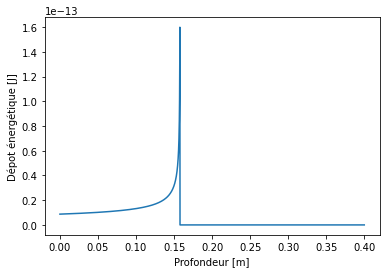

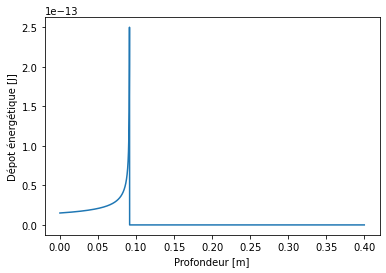

In [27]:



s = 0.0001
profondeur_eau = []
depot_eau = [0]
profondeur_os = []
depot_os = [0]
for x in range(4000):
    if sum(depot_eau) >= 147*1.602e-13:
        depot_eau.append(0)
    else:
        depot_eau.append((f_eau((150*1.602e-13)-sum(depot_eau)))*s)
    profondeur_eau.append(s*x)
# print(depot)
plt.plot(profondeur_eau, depot_eau[1:])
plt.xlabel("Profondeur [m]")
plt.ylabel('Dépot énergétique [J]')
plt.show()


for x in range(4000):
    if sum(depot_os) >= 147*1.602e-13:
        depot_os.append(0)
    else:
        depot_os.append((f_os((150*1.602e-13)-sum(depot_os)))*s)
    profondeur_os.append(s*x)
# print(depot)
plt.plot(profondeur_os, depot_os[1:])
plt.xlabel("Profondeur [m]")
plt.ylabel('Dépot énergétique [J]')
plt.show()